# Problem1

##

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
data=np.genfromtxt("data/curve80.txt",delimiter=None)
X = data[:,0]
X = np.atleast_2d(X).T
Y = data[:,1] 
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) 
print(Xtr.shape)
print(Xte.shape)
print(Ytr.shape)
print(Yte.shape)

(60, 1)
(20, 1)
(60,)
(20,)


##

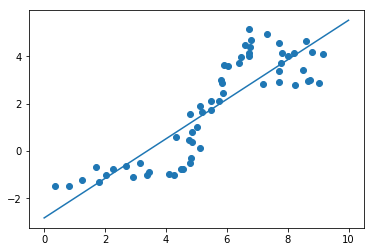

[[-2.82765049  0.83606916]]
[[ 1.12771196]]
[[ 2.2423492]]


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
data=np.genfromtxt("data/curve80.txt",delimiter=None)
X = data[:,0]
X = np.atleast_2d(X).T
Y = data[:,1] 
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) 
lr = ml.linear.linearRegress( Xtr, Ytr )
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
ys = lr.predict(xs)
plt.scatter(Xtr,Ytr)
plt.plot(xs,ys)
plt.show()
print(lr.theta)
list=[1]
list=list*60
arr=np.array(list)
arr1=np.c_[np.array(arr),np.array(Xtr)]
YY=Ytr.reshape(60,1)
e = YY-arr1.dot(lr.theta.T)
J = e.T.dot( e )/60 
print(J)
list=[1]
list=list*20
arr=np.array(list)
arr1=np.c_[np.array(arr),np.array(Xte)]
YY=Yte.reshape(20,1)
e = YY-arr1.dot(lr.theta.T)
J = e.T.dot( e )/20 
print(J)

so from the above we can see lr.theta is [[-2.82765049  0.83606916]] which verify my plot

The mean squared error of the predictions on the training data is [[ 1.12771196]], on test data is [[ 2.2423492]]

##

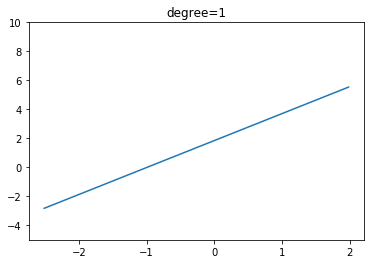

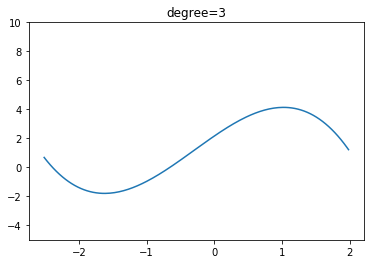

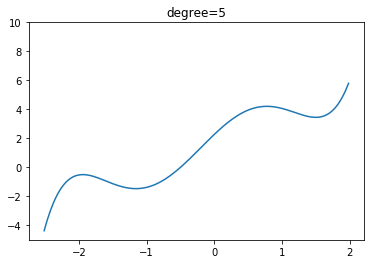

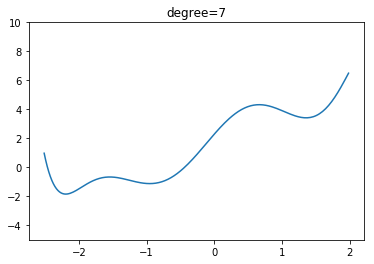

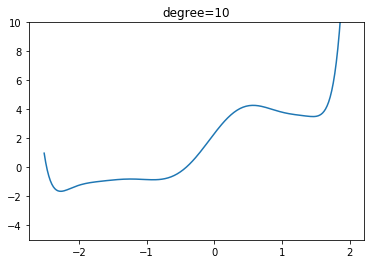

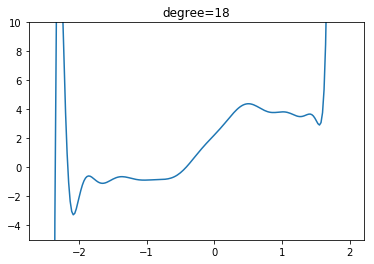

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
data=np.genfromtxt("data/curve80.txt",delimiter=None)
set=[1,3,5,7,10,18]
X = data[:,0]
X = np.atleast_2d(X).T
Y = data[:,1] 
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)
#lt.figure()
#ount=1
for i in set:    
    XtrP = ml.transforms.fpoly(Xtr, i, bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress( XtrP, Ytr )
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,i,bias=False), params)
    xs = np.linspace(0,10,200)
    xs = xs[:,np.newaxis]
    xs,_ = ml.transforms.rescale( ml.transforms.fpoly(xs,i,bias=False), params)
    ys = lr.predict(xs)
    #lt.subplot(3,2,count)
    #ount+=1
    plt.plot(xs[:,0],ys)
    plt.ylim(-5,10)
    plt.title("degree="+str(i))
    plt.show()    


learned functions are above, corresponding to 6 degrees.

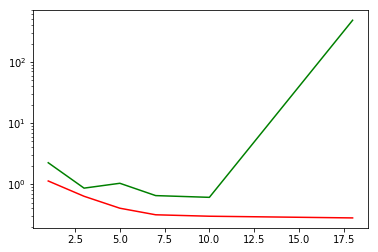

[2.2423492030101251, 0.86161148154499967, 1.0344190205632322, 0.65022460796711801, 0.60906007489215719, 481.20330774327448]


In [119]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
data=np.genfromtxt("data/curve80.txt",delimiter=None)
set=[1,3,5,7,10,18]
X = data[:,0]
X = np.atleast_2d(X).T
Y = data[:,1] 
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)
Jtr=[0,0,0,0,0,0]
Jte=[0,0,0,0,0,0]
for j,i in enumerate(set):
    XtrP = ml.transforms.fpoly(Xtr, i, bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress( XtrP, Ytr ) 
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,i,bias=False), params)
    Ytrp=lr.predict(XtrP)
    Ytep=lr.predict(XteP)
    list=[1]
    list=list*60
    arr=np.array(list)
    arr1=np.c_[np.array(arr),np.array(XtrP)]
    YY=Ytr.reshape(60,1)
    e = YY-arr1.dot(lr.theta.T)
    Jtr[j] = e.T.dot( e )/60 
    list=[1]
    list=list*20
    arr=np.array(list)
    arr1=np.c_[np.array(arr),np.array(XteP)]
    YY=Yte.reshape(20,1)
    e = YY-arr1.dot(lr.theta.T)
    Jte[j] = e.T.dot( e )/20 
arr1=[0,0,0,0,0,0]
arr2=[0,0,0,0,0,0]
for l,k in enumerate(Jtr):
    arr1[l]=k[0][0]
for l,k in enumerate(Jte):
    arr2[l]=k[0][0]
plt.semilogy(set,arr1,'r')
plt.semilogy(set,arr2,'g')
plt.show()
print(arr2)

(c). 10.  10 degree is best because green line has its lowest MSE there.

# Problem2

##

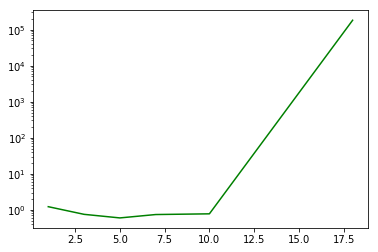

[1.2118626629641986, 0.7429005752051665, 0.59107037264069906, 0.73356378313114556, 0.76770568904328906, 182444.05135537352]


In [143]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
data=np.genfromtxt("data/curve80.txt",delimiter=None)
set=[1,3,5,7,10,18]
X = data[:,0]
X = np.atleast_2d(X).T
Y = data[:,1] 
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)
J=[0,0,0,0,0]
crossval=[0,0,0,0,0,0]
nFolds = 5;

for j,i in enumerate(set):
    for iFold in range(nFolds):
        XtrP = ml.transforms.fpoly(Xtr, i, bias=False)
        XtrP,params = ml.transforms.rescale(XtrP)
        Xti,Xvi,Yti,Yvi = ml.crossValidate(XtrP,Ytr,nFolds,iFold) 
        learner = ml.linear.linearRegress(Xti,Yti)  
        list=[1]
        list=list*12
        arr=np.array(list)
        arr1=np.c_[np.array(arr),np.array(Xvi)]
        YY=Yvi.reshape(12,1)
        e = YY-arr1.dot(learner.theta.T) 
        J[iFold] =e.T.dot( e )/12
    crossval[j]=np.mean(J)
plt.semilogy(set,crossval,'g')
plt.show()
print(crossval)

##

using print(crossval),we know the values of cross-validation MSEs. Compared to the test data MSEs,

 we see that when degree=1,3,5, the MSEs of cross-validation are smaller than test data MSEs.

But when degree=7,10,18, the MSEs of cross-validation are bigger than test data MSEs.

##

I recommand degree 5 because it has the lowest MSE.

##

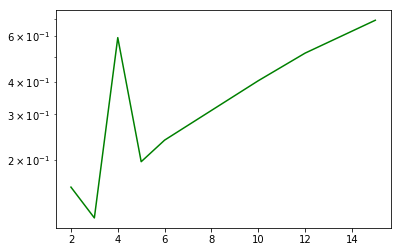

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
data=np.genfromtxt("data/curve80.txt",delimiter=None)
nFolds=[2,3,4,5,6,10,12,15]
X = data[:,0]
X = np.atleast_2d(X).T
Y = data[:,1] 
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)
J=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
crossval=[0,0,0,0,0,0,0,0]
j=0
for p,iFold in enumerate(nFolds):
    for i in range(iFold):
        XtrP = ml.transforms.fpoly(Xtr, 5, bias=False)
        XtrP,params = ml.transforms.rescale(XtrP)
        Xti,Xvi,Yti,Yvi = ml.crossValidate(XtrP,Ytr,iFold,i) 
        learner = ml.linear.linearRegress(Xti,Yti)
        num=int(60/iFold)
        list=[1]
        list=list*num
        arr=np.array(list)
        arr1=np.c_[np.array(arr),np.array(Xvi)]
        YY=Yvi.reshape(num,1)
        e = YY-arr1.dot(learner.theta.T) 
        J[i] =e.T.dot( e )/num
    crossval[j]=np.mean(J)
    j+=1
plt.semilogy(nFolds,crossval,'g')
plt.show()

When nFolds number is 2, the number of trian data is equal to validation data.

When number becomes 3, it have a lowest MSE.But when it becomes 4, the number of training data is 3 times 

of validation data, which makes error increased. And when the number becomes 5 and larger, the number of 

validation data becomes smaller and smaller, which made the MSEs increase steadily.

# Statement of Collaboration

No disscuss with others